In [167]:
import matplotlib.pyplot as plt
import numpy as np
import random
import tqdm
import pandas as pd

In [2]:
import os
curdir = os.getcwd()

In [6]:
from typing import Tuple, List
Vector = List[float]

In [4]:
import time
now_time = 1610366047.3755555
to_do = "함수 least_squares_fit을 작성하기 위해 stats 파일에 있는 기초함수를 구현한다"
page = 202

#### 21-01-13

In [126]:
os.chdir('C:/Users/jongh/OneDrive/python/machine-learning/Data-Science-from-Scratch-master/code-python3')
from stats import correlation, standard_deviation, mean, num_friends_good, daily_minutes_good
from gradient_descent import step
os.chdir(curdir)

In [12]:
def least_square_fit(x:Vector, y:Vector)->Tuple[float, float]:
    beta = correlation(x, y) * standard_deviation(y) / standard_deviation(x)
    alpha = mean(y) - beta * mean(x)
    return alpha, beta

assert least_square_fit(x, y) == (-5, 3)

In [49]:
x = [i for i in range(-100, 110, 10)]
y = [3*i-5 for i in x]

In [31]:
_alpha, _beta = least_square_fit(num_friends_good, daily_minutes_good)

In [60]:
def predict(alpha, beta, x_i):
    x_i = np.array(x_i)
    return beta * x_i + alpha

In [61]:
_predict = predict(_alpha, _beta, num_friends_good)

In [62]:
def error(alpha, beta, x_i, y_i):
    y_i = np.array(y_i)
    return predict(alpha, beta, x_i) - y_i

In [65]:
_error = error(_alpha, _beta, num_friends_good, daily_minutes_good)

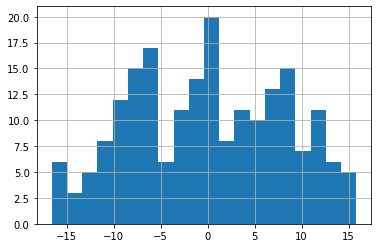

In [201]:
_df = pd.DataFrame(_error, columns=['error'])
# category = pd.cut(_df['error'], 30)
_df['error'].hist(bins=20)
plt.show()

In [71]:
def sum_of_sqerrors(alpha, beta, x, y):
    _error = error(_alpha, _beta, x, y)    
    return sum(_error ** 2)

In [79]:
def total_sum_of_squares(y):
    y = np.array(y)
    y_bar = np.mean(y)
    return sum((y - y_bar) ** 2)

In [250]:
sse = sum_of_sqerrors(_alpha, _beta, num_friends_good, daily_minutes_good)
sst = total_sum_of_squares(daily_minutes_good)
length = len(daily_minutes_good)
mean = np.array(daily_minutes_good).mean()

In [100]:
y_bar = np.array(daily_minutes_good).mean()

In [115]:
(sum(error(_alpha, _beta, num_friends_good, daily_minutes_good) ** 2) / length) ** (1/2)

8.062752435241086

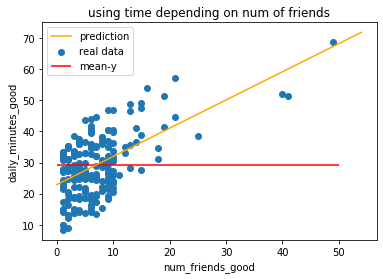

In [124]:
plt.scatter(num_friends_good, daily_minutes_good)
_x = np.arange(-0, 55)
plt.plot(_x, _x * _beta + _alpha, c='orange')
plt.title("using time depending on num of friends")
plt.xlabel("num_friends_good")
plt.ylabel("daily_minutes_good")

plt.hlines(mean, 0, 50,  colors='r')
plt.legend(['prediction', 'real data', 'mean-y'])

plt.show()

## 14.2 경사 하강법 사용하기

In [165]:
random.seed(0)
guess = [random.random(), random.random()]
lr = 1e-5
num_epochs = 10000

alpha, beta = guess
/print guess

loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)

with tqdm.trange(num_epochs) as t:
    for _ in t:
        alpha,beta = guess
        grad_a = sum(2 * error(alpha, beta, num_friends_good, daily_minutes_good))
        
        grad_b = sum(2*error(alpha, beta, num_friends_good, daily_minutes_good)*num_friends_good)
        
        loss = sum_of_sqerrors(alpha, beta, num_friends_good, daily_minutes_good)
        t.set_description(f"loss: {loss:.3f}")
        
        guess = step(guess, [grad_a, grad_b], -lr)

alpha, beta = guess
alpha, beta

loss: 13196.619:   1%|▍                                                            | 81/10000 [00:00<00:12, 780.95it/s]

[0.8444218515250481, 0.7579544029403025]


loss: 13196.619: 100%|██████████████████████████████████████████████████████████| 10000/10000 [00:12<00:00, 806.60it/s]


(22.947552155340915, 0.9038659662765034)

### https://brunch.co.kr/@zhoyp/169

In [203]:
index = ['철수', '영희', '순이', '갑돌', '기영']
columns = ['키', '몸무게']
sta_df = pd.DataFrame(index=index, columns=columns)

In [204]:
sta_df['키'] = [100, 90, 105, 110, 95]
sta_df['몸무게'] = [50, 45, 60, 55, 40]
sta_df

,키,몸무게
철수,100,50
영희,90,45
순이,105,60
갑돌,110,55
기영,95,40


In [207]:
height_mean = sta_df['키'].mean()
weight_mean = sta_df['몸무게'].mean()

In [226]:
height_std = sta_df['키'].std(ddof=0)
weight_std = sta_df['몸무게'].std(ddof=0)

In [227]:
sta_df['stndard_height'] = (sta_df['키'] - height_mean) / height_std

In [228]:
sta_df['stndard_weight'] = (sta_df['몸무게'] - weight_mean) / weight_std

In [229]:
sta_df['standard_height*weight'] = sta_df['stndard_height'] * sta_df['stndard_weight']

In [231]:
sta_df

,키,몸무게,stndard_height,stndard_weight,standard_height*weight
철수,100,50,0.000000,0.000000,0.0
영희,90,45,-1.414214,-0.707107,1.0
순이,105,60,0.707107,1.414214,1.0
갑돌,110,55,1.414214,0.707107,1.0
기영,95,40,-0.707107,-1.414214,1.0


In [235]:
상관계수 = sta_df['standard_height*weight'].mean()
상관계수

0.7999999999999998

### https://www.youtube.com/watch?v=XhC1RQimW-g

In [239]:
os.chdir('C:/Users/jongh/OneDrive/python/machine-learning/data')
housedata = pd.read_csv('kc_house_data.csv')
os.chdir(curdir)

In [244]:
housedata.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

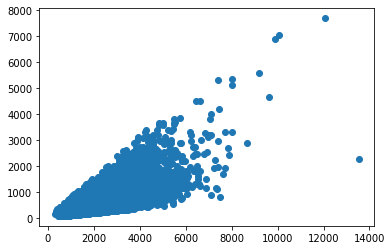

In [249]:
plt.scatter(housedata['sqft_living'], housedata['price']/1000)
plt.show()